In [1]:
%load_ext autoreload
%autoreload 2

### Load connected regions

In [2]:
import sys
sys.path.append("../")
import regionate as reg
import sectionate as sec

In [3]:
import numpy as np
import matplotlib.pyplot as plt
div_cmap = plt.get_cmap("RdBu_r")
div_cmap.set_bad("grey")

import scipy.io
basins = scipy.io.loadmat('/work/hfd/datasets/shapefiles/bsn_boundary_cleaned.mat', simplify_cells=True, squeeze_me=True)['bsn_only']

/vftmp/Henri.Drake/pid12402/ipykernel_15546/291256048.py:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu_r").copy()
  div_cmap.set_bad("grey")


In [4]:
div_cmap = plt.get_cmap("RdBu_r").copy()
div_cmap.set_bad("grey")

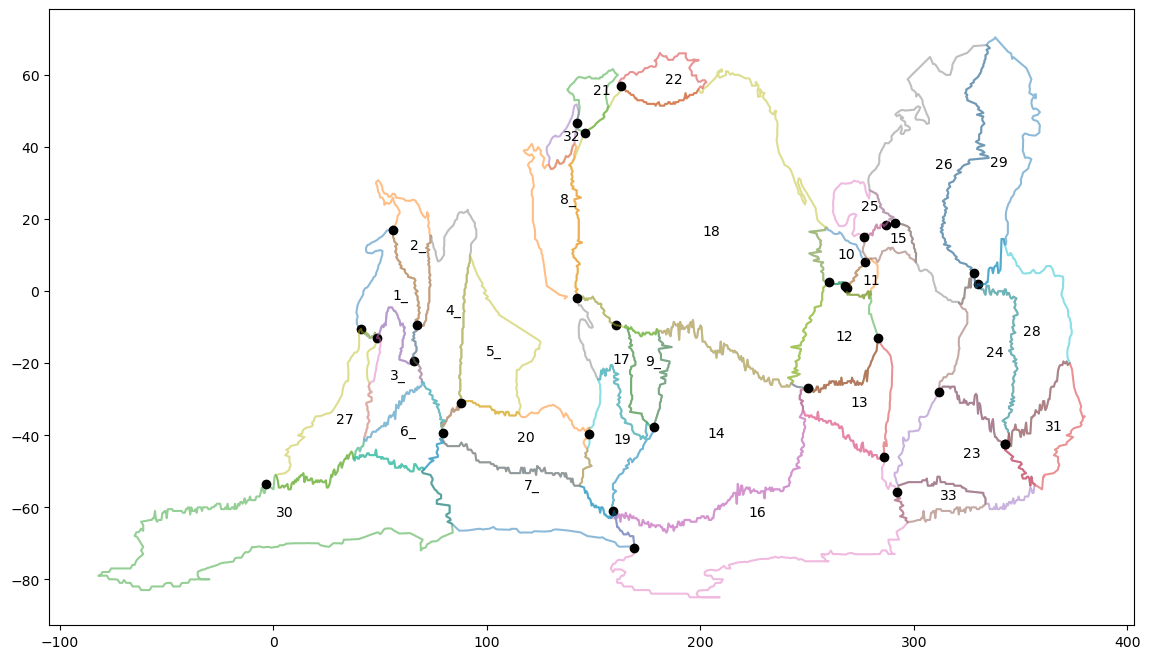

In [5]:
plt.figure(figsize=(14, 8))
for b in basins:
    B = reg.Basin(b['bsn'][0], b['bsn'][1], str(b['bsn_num']))
    
    plt.plot(B.lons, B.lats, alpha=0.5)
    plt.plot(B.lons[0], B.lats[0], "ko")
    plt.annotate(B.name, xy=(0.,0), xytext=(np.mean(B.lons), np.mean(B.lats)), textcoords="data")

In [6]:
Basins = {str(b['bsn_num'].replace("_", "")): reg.Basin(b['bsn'][0], b['bsn'][1], str(b['bsn_num'].replace("_", ""))) for b in basins}
Basins = reg.ConnectedBasins(Basins)
Basins.find_all_overlaps()

Finding overlaps for basin: 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 2, 30, 31, 32, 33, 3, 4, 5, 6, 7, 8, 9, 

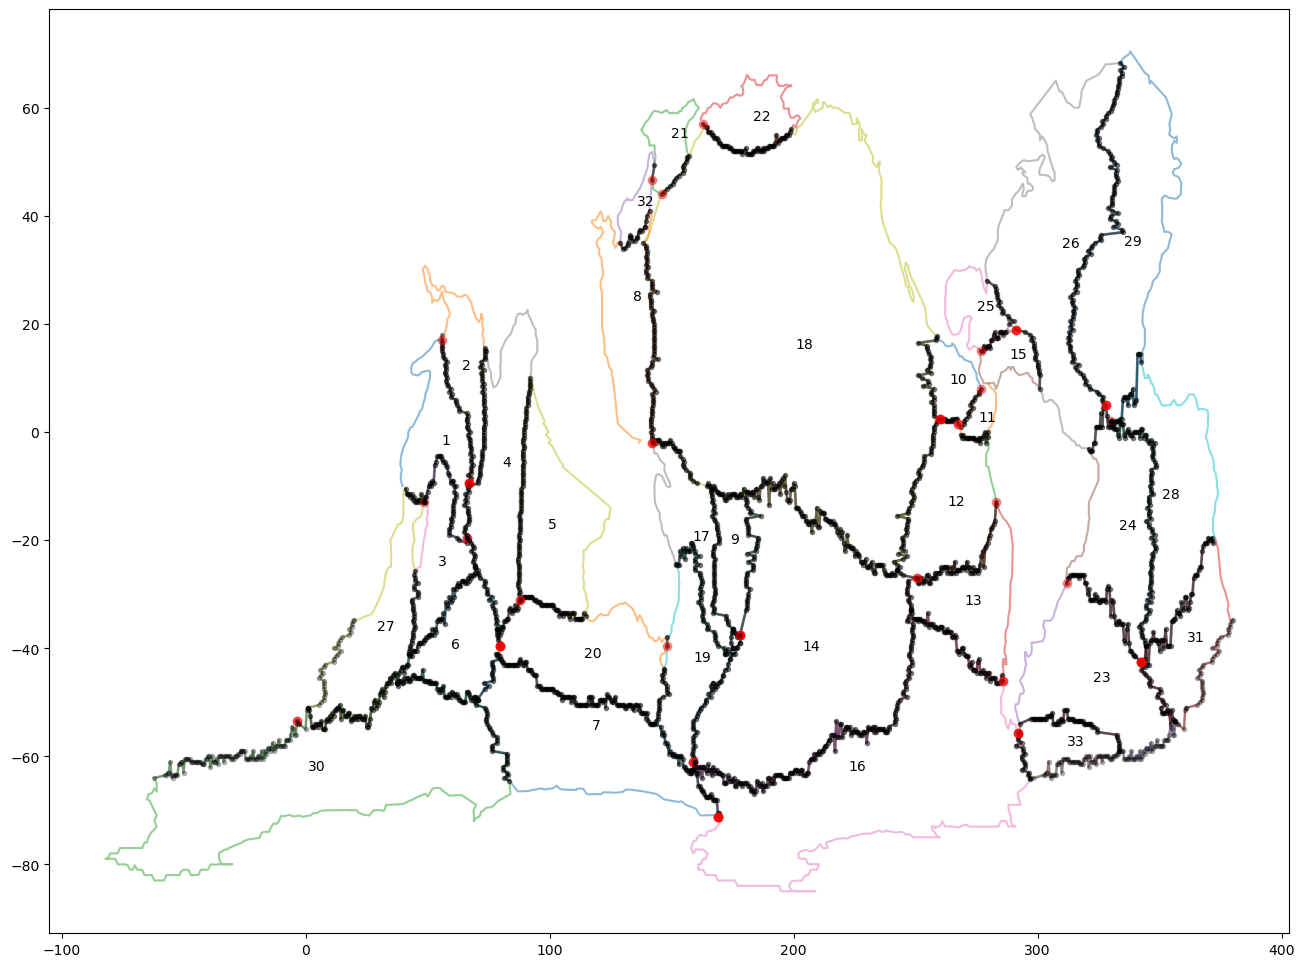

In [84]:
plt.figure(figsize=(16, 12))
for i, (Bname, B) in enumerate(Basins.Basins.items()):
    plt.plot(B.lons, B.lats, alpha=0.5)
    plt.annotate(B.name, xy=(np.mean(B.lons), np.mean(B.lats)), xytext=(np.mean(B.lons), np.mean(B.lats)), textcoords="data")
for (B1name, B2name), o in Basins.overlaps.items():
    for oo in o[B1name].values():
        plt.plot(Basins.Basins[B1name].lons[oo], Basins.Basins[B1name].lats[oo], "k.-", alpha=0.25, lw=2.)
    for oo in o[B2name].values():
        plt.plot(Basins.Basins[B2name].lons[oo], Basins.Basins[B2name].lats[oo], "k.-", alpha=0.25, lw=2.)
    plt.plot(Basins.Basins[B1name].lons[0], Basins.Basins[B1name].lats[0], "ro", alpha=0.4)

### Pickle connected basins

In [85]:
import pickle
BasinsFile = "pickled_regions/PJ2010_regions"
with open(BasinsFile, 'wb') as pickle_file:
    pickle.dump(Basins, pickle_file)